# Linkedin Data Collection

## Authorization

https://developer.linkedin.com/docs/oauth2

In [2]:
import oauth2
import requests
import json
import urllib
import urllib2

In [1]:
API_KEY = 'YOUR API KEY'
API_SECRET = 'YOUR API SECRET'
RETURN_URL = 'https://semihakbayrak.github.io'

In [4]:
#This is the url, a user should click to be directed to permission pop-up
permission_url = "https://www.linkedin.com/uas/oauth2/authorization?scope=r_basicprofile%20rw_company_admin%20r_emailaddress&state=2484ecd2faaecbd4d5882b0d8e021090&redirect_uri=https%3A//semihakbayrak.github.io&response_type=code&client_id="+API_KEY

In [2]:
# Code gotten from redirected url
generated_code = "Code gotten from redirected url"

In [21]:
access_token_request = "https://www.linkedin.com/oauth/v2/accessToken?grant_type=authorization_code&code="+generated_code+"&redirect_uri=https%3A//semihakbayrak.github.io&client_id="+API_KEY+"&client_secret="+API_SECRET
url = urllib.urlopen(access_token_request).read()
result = json.loads(url)

In [23]:
access_token = result['access_token']

## User Profile

https://developer.linkedin.com/docs/fields/basic-profile

In [40]:
r=requests.get("https://api.linkedin.com/v1/people/~:(firstName,lastName,location,id,num-connections,picture-url,industry,summary,specialties)?format=json", headers={"Connection": "Keep-Alive","Authorization": "Bearer "+access_token});

In [41]:
r.json()

{u'firstName': u'Arman',
 u'id': u'pb_uMzjyIG',
 u'industry': u'Information Technology and Services',
 u'lastName': u'Boyac\u0131, Ph.D.',
 u'location': {u'country': {u'code': u'tr'}, u'name': u'Turkey'},
 u'numConnections': 500,
 u'pictureUrl': u'https://media.licdn.com/mpr/mprx/0_Cc2LxDd8mL-I4SNuDQZHAJF87ANE4uEyC1ZwJZy8mkMI4porC395qeH8W8YEZmwKaQswcsFh_F_wUebjIkdJBJE26F_oUHmymkd6y4x3D6nQlOvhGzxepulrQtMV-HJSFFSdRQiG9P9',
 u'summary': u'Specialties: Combinatorial Optimization, Graph Theory, Operations Research, Machine Learning, Pattern Recognition, Web Design, Web-based Applications'}

In [42]:
import urllib, cStringIO
from PIL import Image
from IPython import display

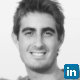

In [43]:
URL = "https://media.licdn.com/mpr/mprx/0_Cc2LxDd8mL-I4SNuDQZHAJF87ANE4uEyC1ZwJZy8mkMI4porC395qeH8W8YEZmwKaQswcsFh_F_wUebjIkdJBJE26F_oUHmymkd6y4x3D6nQlOvhGzxepulrQtMV-HJSFFSdRQiG9P9"
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = Image.open(file)
display.display(img)

## Company Pages

https://developer.linkedin.com/docs/company-pages

In [11]:
r=requests.get("https://api.linkedin.com/v1/companies/17906074?format=json", headers={"Connection": "Keep-Alive","Authorization": "Bearer "+access_token});

In [12]:
print r.json()

{u'id': 17906074, u'name': u'Exponima'}


In [13]:
r=requests.get("https://api.linkedin.com/v1/companies/17906074:(id,name,ticker,description)?format=json", headers={"Connection": "Keep-Alive","Authorization": "Bearer "+access_token});

In [14]:
print r.json()

{u'description': u'Machine Learning research and projects for public good, non-profit organizations, and cultural activities.', u'name': u'Exponima', u'id': 17906074}


## Page Posts

Post content, likes, and comments.

In [15]:
r=requests.get("https://api.linkedin.com/v1/companies/17906074/updates?format=json", headers={"Connection": "Keep-Alive","Authorization": "Bearer "+access_token});